In [1]:
# Import and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("Libraries loaded. Starting EDA...")

Libraries loaded. Starting EDA...


In [2]:
# Load the cleaned data from previous notebook
df = pd.read_csv('../data/processed/australia_covid_cleaned.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print("\nFirst few rows:")
print(df.head())

Dataset shape: (1674, 12)
Date range: 2020-01-05 00:00:00 to 2024-08-04 00:00:00

First few rows:
        date  new_cases  total_cases  new_deaths  total_deaths  \
0 2020-01-05        0.0          0.0         0.0           0.0   
1 2020-01-06        0.0          0.0         0.0           0.0   
2 2020-01-07        0.0          0.0         0.0           0.0   
3 2020-01-08        0.0          0.0         0.0           0.0   
4 2020-01-09        0.0          0.0         0.0           0.0   

   people_vaccinated  people_fully_vaccinated  new_vaccinations  population  \
0               20.0                      3.0            2769.0    26177410   
1               20.0                      3.0            2769.0    26177410   
2               20.0                      3.0            2769.0    26177410   
3               20.0                      3.0            2769.0    26177410   
4               20.0                      3.0            2769.0    26177410   

   case_fatality_rate  cases_p

In [3]:
# Descriptive Statistics

print("="*60)
print("DESCRIPTIVE STATISTICS")
print("="*60)

print("\nCases Summary:")
print(f"  Total cases: {df['total_cases'].iloc[-1]:,.0f}")
print(f"  Peak daily cases: {df['new_cases'].max():,.0f}")
print(f"  Average daily cases: {df['new_cases'].mean():,.0f}")
print(f"  Median daily cases: {df['new_cases'].median():,.0f}")

print("\nDeaths Summary:")
print(f"  Total deaths: {df['total_deaths'].iloc[-1]:,.0f}")
print(f"  Peak daily deaths: {df['new_deaths'].max():,.0f}")
print(f"  Case fatality rate: {df['case_fatality_rate'].iloc[-1]:.2f}%")

print("\nVaccination Summary:")
print(f"  People vaccinated: {df['people_vaccinated'].iloc[-1]:,.0f}")
print(f"  Vaccination rate: {df['vaccination_rate'].iloc[-1]:.2f}%")

print("\nDetailed Statistics:")
print(df[['new_cases', 'new_deaths', 'new_vaccinations', 'vaccination_rate']].describe())

DESCRIPTIVE STATISTICS

Cases Summary:
  Total cases: 11,861,161
  Peak daily cases: 588,813
  Average daily cases: 7,086
  Median daily cases: 0

Deaths Summary:
  Total deaths: 25,236
  Peak daily deaths: 1,161
  Case fatality rate: 0.21%

Vaccination Summary:
  People vaccinated: 22,231,734
  Vaccination rate: 84.93%

Detailed Statistics:
           new_cases   new_deaths  new_vaccinations  vaccination_rate
count    1674.000000  1674.000000       1674.000000       1674.000000
mean     7085.520311    15.120669      47891.852449         54.877288
std     41529.928806    72.815596      73488.354377         38.202772
min         0.000000     0.000000       1127.000000          0.000000
25%         0.000000     0.000000       2769.000000          0.112500
50%         0.000000     0.000000      21127.000000         84.930000
75%         0.000000     0.000000      37108.000000         84.930000
max    588813.000000  1161.000000     351226.000000         84.930000


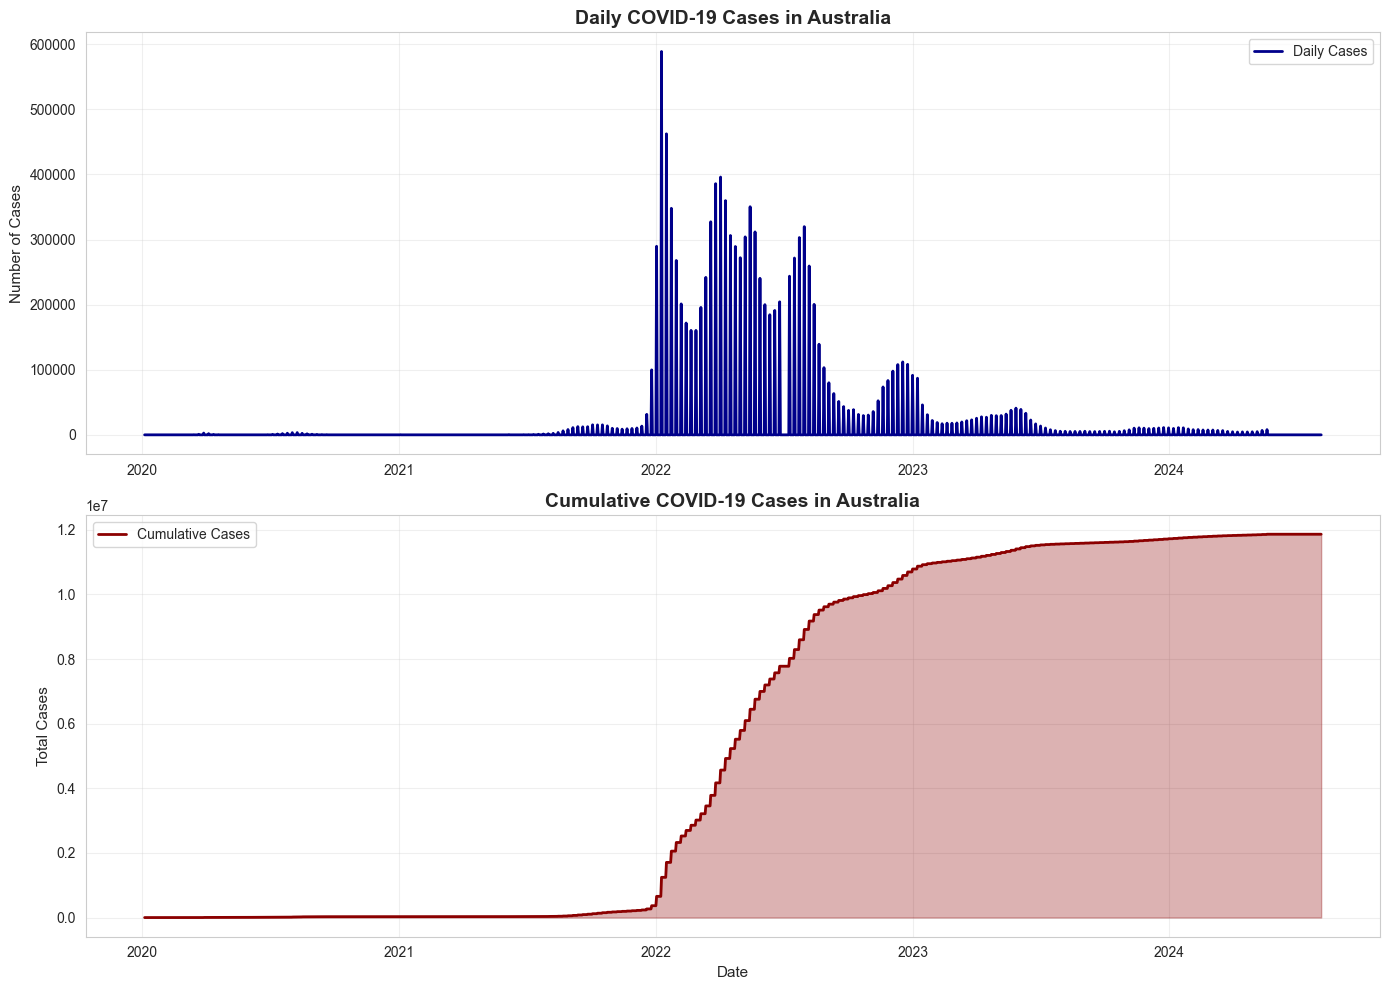

✓ Saved: 01_cases_over_time.png


In [12]:
# Visualization 1 - Cases Over Time

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Daily cases
ax1.plot(df['date'], df['new_cases'], linewidth=2, color='darkblue', label='Daily Cases')
ax1.fill_between(df['date'], df['new_cases'], alpha=0.3, color='darkblue')
ax1.set_title('Daily COVID-19 Cases in Australia', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Cases', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Cumulative cases
ax2.plot(df['date'], df['total_cases'], linewidth=2, color='darkred', label='Cumulative Cases')
ax2.fill_between(df['date'], df['total_cases'], alpha=0.3, color='darkred')
ax2.set_title('Cumulative COVID-19 Cases in Australia', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('Total Cases', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('../results/figures/01_cases_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 01_cases_over_time.png")

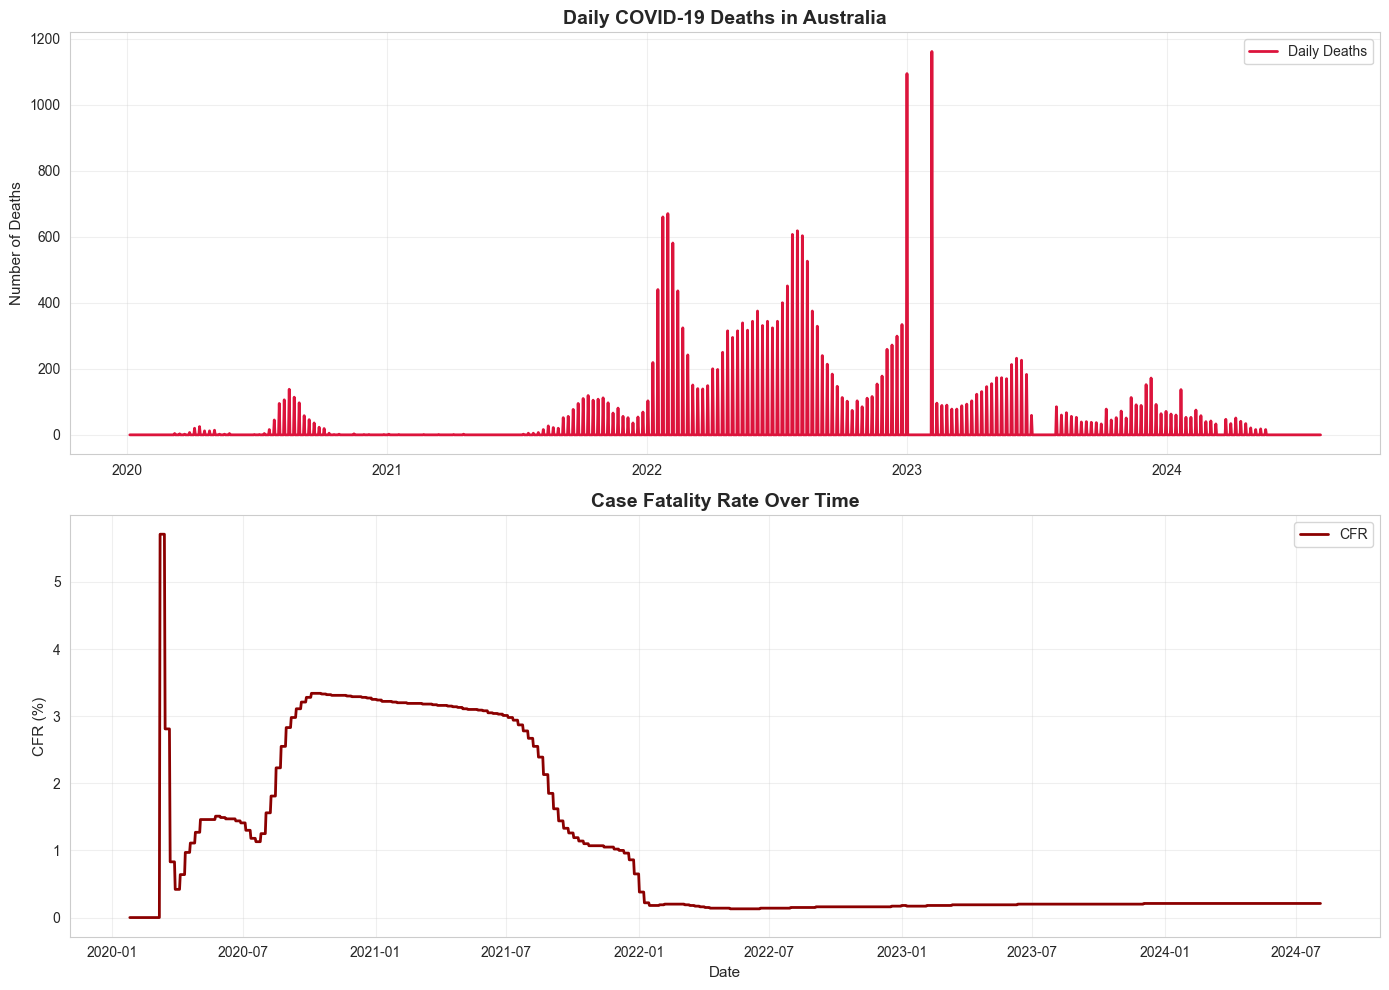

✓ Saved: 02_deaths_trend.png


In [5]:
# Visualization 2 - Deaths Trend

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Daily deaths
ax1.plot(df['date'], df['new_deaths'], linewidth=2, color='crimson', label='Daily Deaths')
ax1.fill_between(df['date'], df['new_deaths'], alpha=0.3, color='crimson')
ax1.set_title('Daily COVID-19 Deaths in Australia', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Deaths', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Case Fatality Rate
ax2.plot(df['date'], df['case_fatality_rate'], linewidth=2, color='darkred', label='CFR')
ax2.set_title('Case Fatality Rate Over Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=11)
ax2.set_ylabel('CFR (%)', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('../results/figures/02_deaths_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 02_deaths_trend.png")

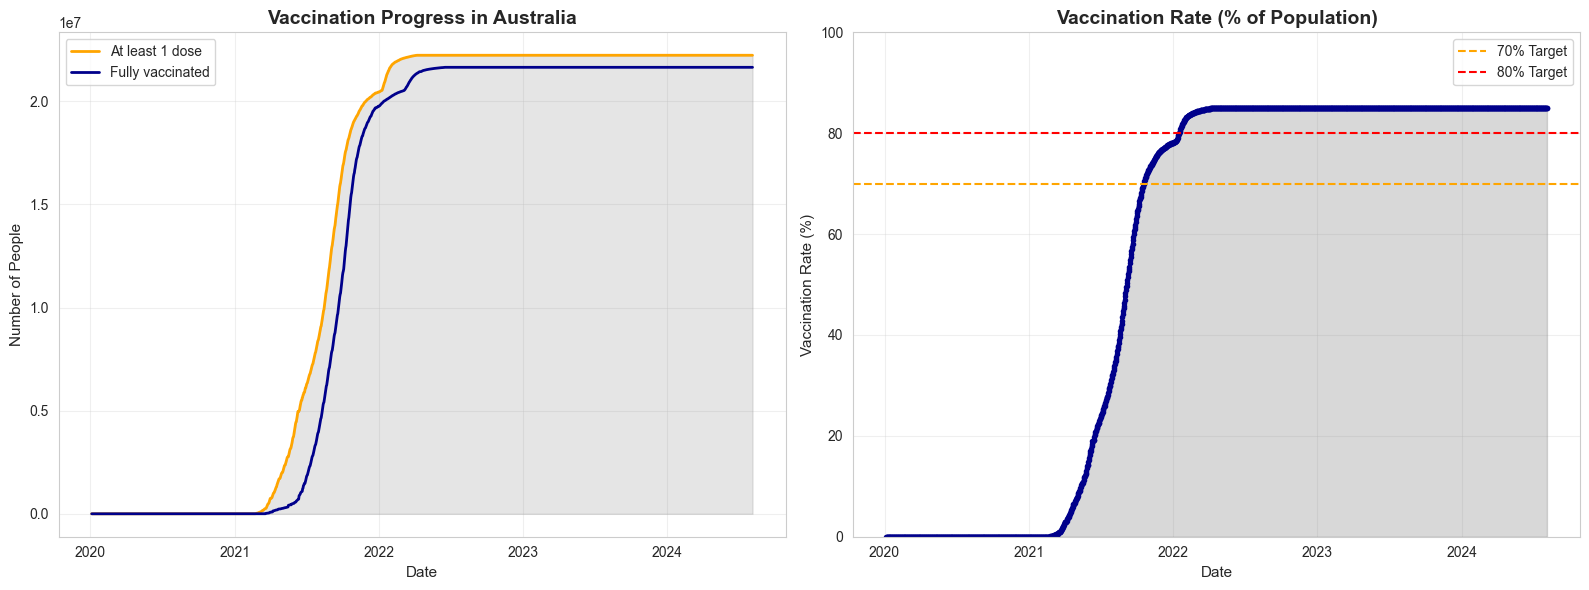

✓ Saved: 03_vaccination_progress.png


In [9]:
# Visualization 3 - Vaccination Progress

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: People vaccinated over time
ax1.plot(df['date'], df['people_vaccinated'], linewidth=2, color='orange', label='At least 1 dose')
ax1.plot(df['date'], df['people_fully_vaccinated'], linewidth=2, color='darkblue', label='Fully vaccinated')
ax1.fill_between(df['date'], df['people_vaccinated'], alpha=0.2, color='grey')
ax1.set_title('Vaccination Progress in Australia', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of People', fontsize=11)
ax1.set_xlabel('Date', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Vaccination rate (%)
ax2.plot(df['date'], df['vaccination_rate'], linewidth=2.5, color='darkblue', marker='o', markersize=3)
ax2.fill_between(df['date'], df['vaccination_rate'], alpha=0.3, color='grey')
ax2.axhline(y=70, color='orange', linestyle='--', label='70% Target')
ax2.axhline(y=80, color='red', linestyle='--', label='80% Target')
ax2.set_title('Vaccination Rate (% of Population)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Vaccination Rate (%)', fontsize=11)
ax2.set_xlabel('Date', fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.savefig('../results/figures/03_vaccination_progress.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 03_vaccination_progress.png")

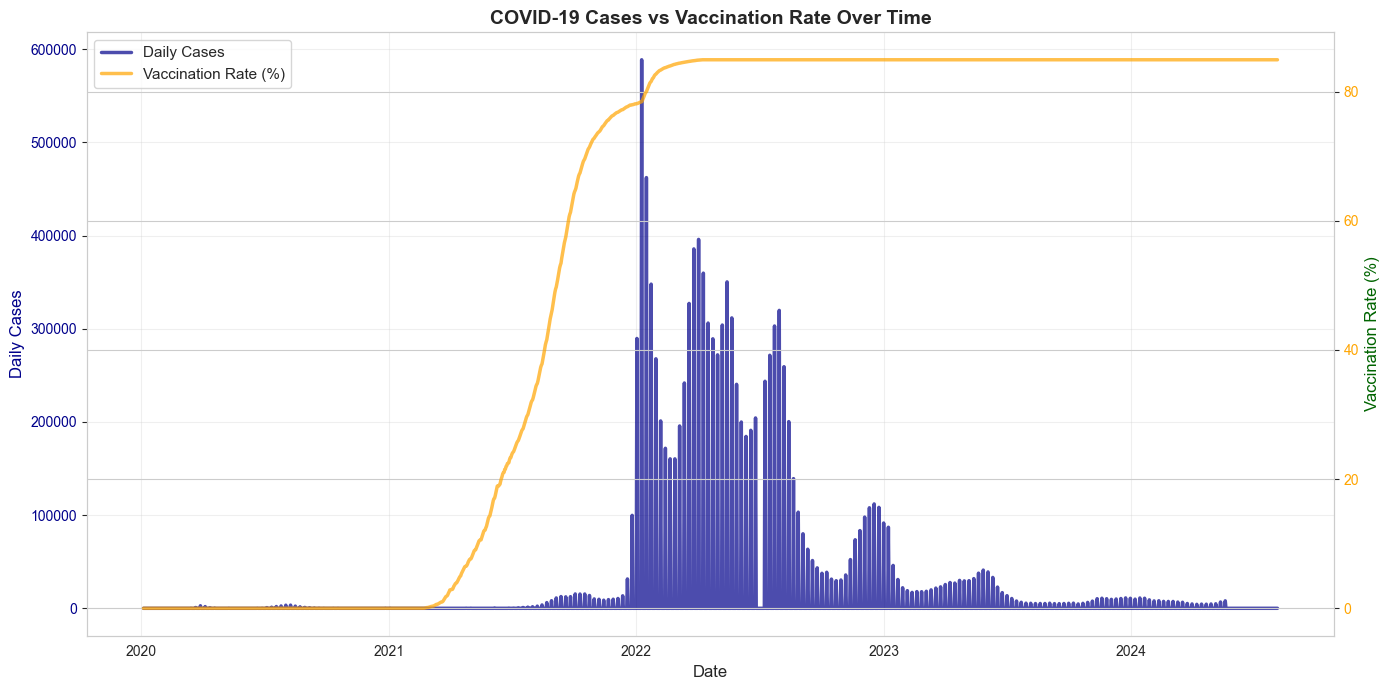

✓ Saved: 04_cases_vs_vaccination.png


In [13]:
# Visualization 4 - Cases vs Vaccination (Correlation)

# Focus on period where both data exist
df_valid = df.dropna(subset=['new_cases', 'people_vaccinated'])

fig, ax = plt.subplots(figsize=(14, 7))

# Create dual-axis plot
ax1 = ax
ax2 = ax1.twinx()

# Plot cases on left axis
line1 = ax1.plot(df_valid['date'], df_valid['new_cases'], 
                 linewidth=2.5, color='darkblue', label='Daily Cases', alpha=0.7)
ax1.set_ylabel('Daily Cases', fontsize=12, color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Plot vaccination on right axis
line2 = ax2.plot(df_valid['date'], df_valid['vaccination_rate'], 
                 linewidth=2.5, color='orange', label='Vaccination Rate (%)', alpha=0.7)
ax2.set_ylabel('Vaccination Rate (%)', fontsize=12, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_title('COVID-19 Cases vs Vaccination Rate Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=11)

plt.tight_layout()
plt.savefig('../results/figures/04_cases_vs_vaccination.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 04_cases_vs_vaccination.png")

In [14]:
# Statistical Analysis - Correlation

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select numeric columns for correlation
numeric_cols = ['new_cases', 'new_deaths', 'new_vaccinations', 
                'people_vaccinated', 'vaccination_rate', 'case_fatality_rate']

correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation with New Cases:")
print(correlation_matrix['new_cases'].sort_values(ascending=False))

print("\n" + "="*60)
print("Key Correlations:")
print("="*60)

# Calculate specific correlations with p-values
cases_vaccination_corr = df['new_cases'].corr(df['vaccination_rate'])
cases_deaths_corr = df['new_cases'].corr(df['new_deaths'])

print(f"\nNew Cases vs Vaccination Rate: {cases_vaccination_corr:.4f}")
print(f"New Cases vs New Deaths: {cases_deaths_corr:.4f}")

# Statistical test
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['new_cases'].dropna(), df['vaccination_rate'].dropna())
print(f"\nPearson Correlation (Cases vs Vaccination):")
print(f"  Correlation: {corr:.4f}")
print(f"  P-value: {p_value:.4e}")

CORRELATION ANALYSIS

Correlation with New Cases:
new_cases             1.000000
new_deaths            0.696478
people_vaccinated     0.127231
vaccination_rate      0.127231
new_vaccinations      0.056141
case_fatality_rate   -0.117633
Name: new_cases, dtype: float64

Key Correlations:

New Cases vs Vaccination Rate: 0.1272
New Cases vs New Deaths: 0.6965

Pearson Correlation (Cases vs Vaccination):
  Correlation: 0.1272
  P-value: 1.7609e-07


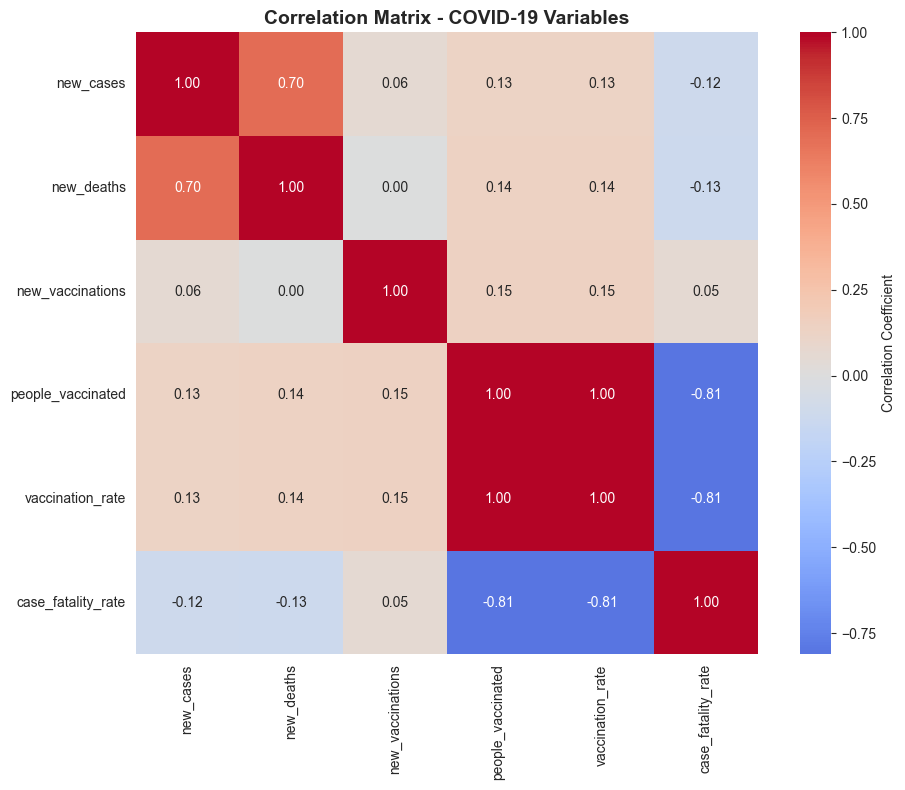

✓ Saved: 05_correlation_heatmap.png


In [15]:
# Visualization 5 - Correlation Heatmap

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix - COVID-19 Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/05_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 05_correlation_heatmap.png")

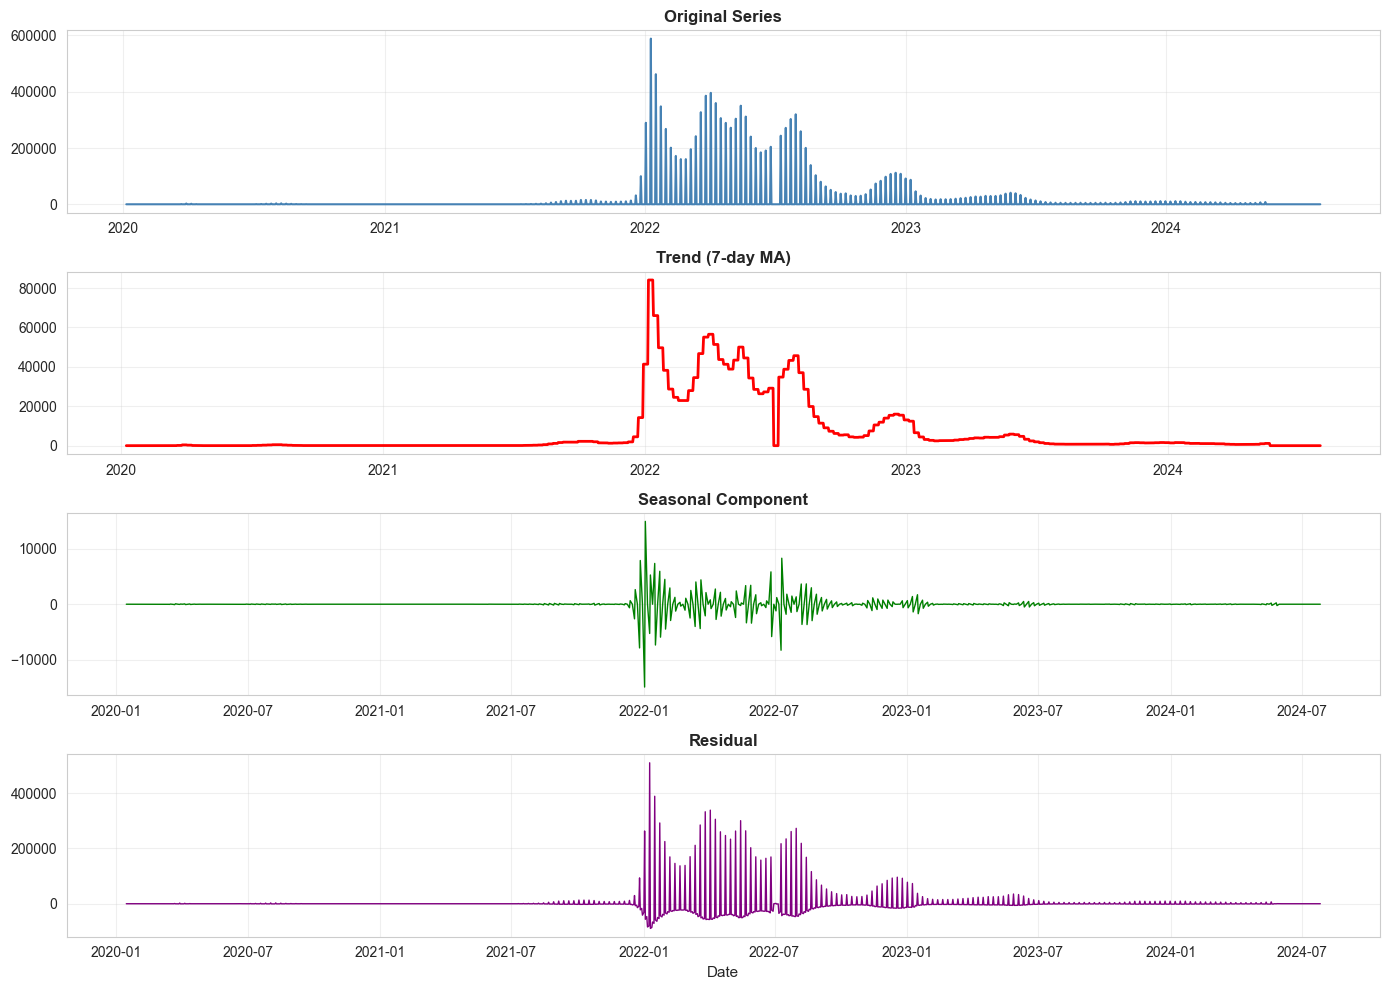

✓ Saved: 06_time_series_decomposition.png


In [16]:
# Time Series Decomposition

from scipy import signal

# Focus on new cases for decomposition
cases_series = df['new_cases'].fillna(0).values

# Calculate 7-day moving average (trend)
trend = pd.Series(cases_series).rolling(window=7, center=True).mean()

# Calculate seasonal pattern (14-day cycle)
detrended = pd.Series(cases_series) - trend
seasonal = detrended.rolling(window=14, center=True).mean()

# Calculate residual
residual = pd.Series(cases_series) - trend - seasonal

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(14, 10))

axes[0].plot(df['date'], cases_series, linewidth=1.5, color='steelblue')
axes[0].set_title('Original Series', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df['date'], trend, linewidth=2, color='red')
axes[1].set_title('Trend (7-day MA)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].plot(df['date'], seasonal, linewidth=1, color='green')
axes[2].set_title('Seasonal Component', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

axes[3].plot(df['date'], residual, linewidth=1, color='purple')
axes[3].set_title('Residual', fontsize=12, fontweight='bold')
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/06_time_series_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: 06_time_series_decomposition.png")

In [18]:
# Key Findings Summary

print("\n" + "="*60)
print("KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")
print("="*60)

# Find peak periods
peak_cases_date = df.loc[df['new_cases'].idxmax(), 'date']
peak_cases_value = df['new_cases'].max()

peak_deaths_date = df.loc[df['new_deaths'].idxmax(), 'date']
peak_deaths_value = df['new_deaths'].max()

final_vaccination = df['vaccination_rate'].iloc[-1]
final_cases = df['total_cases'].iloc[-1]
final_deaths = df['total_deaths'].iloc[-1]

print(f"\n1. Peak Cases:")
print(f"   Date: {peak_cases_date.strftime('%Y-%m-%d')}")
print(f"   Peak daily cases: {peak_cases_value:,.0f}")

print(f"\n2. Peak Deaths:")
print(f"   Date: {peak_deaths_date.strftime('%Y-%m-%d')}")
print(f"   Peak daily deaths: {peak_deaths_value:,.0f}")

print(f"\n3. Final Statistics:")
print(f"   Total cases: {final_cases:,.0f}")
print(f"   Total deaths: {final_deaths:,.0f}")
print(f"   Vaccination rate: {final_vaccination:.2f}%")

print(f"\n4. Trends:")
print(f"   7-day average cases: {df['new_cases'].tail(7).mean():,.0f}")
print(f"   14-day average deaths: {df['new_deaths'].tail(14).mean():,.2f}")

print("\n5. Data Quality:")
print(f"   Records with complete data: {df.dropna().shape[0]} / {df.shape[0]}")
print(f"   Data completeness: {(df.dropna().shape[0] / df.shape[0] * 100):.1f}%")


KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS

1. Peak Cases:
   Date: 2022-01-09
   Peak daily cases: 588,813

2. Peak Deaths:
   Date: 2023-02-05
   Peak daily deaths: 1,161

3. Final Statistics:
   Total cases: 11,861,161
   Total deaths: 25,236
   Vaccination rate: 84.93%

4. Trends:
   7-day average cases: 0
   14-day average deaths: 0.00

5. Data Quality:
   Records with complete data: 1653 / 1674
   Data completeness: 98.7%
